In [1]:
from matplotlib import pyplot as plt
import numpy as np

# Actividad 2 - Dinámica Browniana

## Parte 1.- Ecuación de Langevin

La ecuación de Langevin surge de agregar a la ecuación de movimiento de Newton en un medio con arrastre, un término que representa las fluctuaciones térmicas. En ausencia de otras fuerzas externas, esta ecuación es:
$$ma = -\gamma v + \eta$$
donde m es la masa, a es la aceleración, v es la velocidad, $\gamma$ es el coeficiente de arrastre, y $\eta$ es una variable aleatoria que representa el ruido térmico, con $\langle \eta \rangle = 0$ y $\langle \eta^2 \rangle = 2\gamma k_B T$

1. Encuentra una expresión que describa la media y la varianza de la velocidad conforme pasa el tiempo. Usaremos la ecuación de Langevin para modelar el movimiento de partículas con una masa $m = 0.5$ pg y en un medio con un coeficiente de arrastre de $\gamma = 0.01$ pN s um-1. Haremos estas simulaciones a temperatura ambiente de 300K. 

2. Haz una simulación numérica de la eq. de Langevin
    * Para una partícula empieza a una velocidad de m s-1. Corre varias realizaciones y muestra las lineas en una misma gráfica. Compara este resultado con el resultado analítico del punto 1. ¿Cuál es la velocidad final?
    * Vuelve a correr la misma simulación, pero ahora agrega una fuerza constante N. ¿Cuál es la velocidad final?
    * ¿En qué tiempo característico se vuelve irrelevante la velocidad inicial?

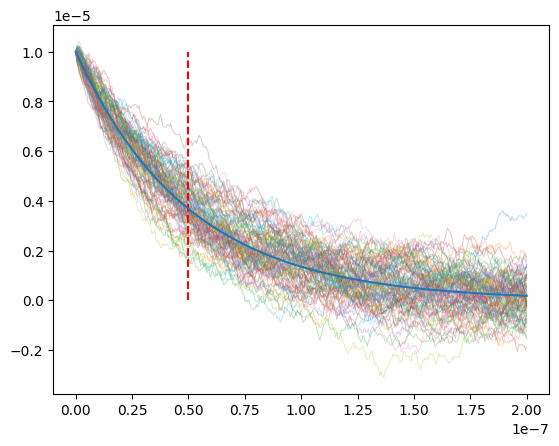

In [7]:
m = 0.5e-15 # pg ---> kg
gamma = 0.01e-6 # pN s / um ---> N s / m
k = 1.380649e-23 # boltzmann
temp = 300e-7 # Kelvin
g = np.sqrt(2 * k * temp * gamma)
sigma_2 = g**2 / (2*m)
sigma = np.sqrt(sigma_2)

F = 0 #1e-15 # fN ---> N

v_0 = 10e-6 # velocidad inicial (m/s)
tau = m / gamma # tiempo caracteristico

tf = 4 * tau
dt = 1e-2 * tau
N = int(np.ceil(tf/dt))
shots = 100 # número de experimentos
v_ = np.zeros((shots, N))
t_ = np.linspace(0, tf, N)
v_[:, 0] = v_0
v_analytic = v_0 * np.exp(-t_ / tau)

for i in range(N-1):
        dW = np.random.randn(shots) * np.sqrt(dt)
        v_[:, i+1] = v_[:, i] + F - gamma/m * v_[:, i] * dt + g/m * dW

fig = plt.figure()
ax = fig.add_subplot()

for i in range(shots):
    ax.plot(t_, v_[i, :], alpha=0.3, linewidth=0.7)

ax.vlines(tau, 0, 1e-5, colors="red", linestyles="dashed")
ax.plot(t_, v_analytic)

plt.show()

3. En los siguientes puntos usaremos el método de Euler para resolver la ecuación de dinámica Browniana usando la aproximación sobreamortiguada. Esta aproximación nos permite escribir la ecuación de Langevin cómo
$$\gamma v = \sum F \eta$$
Esta aproximación es cierta porque cuando la fuerza cambia de forma mucho más lenta que los otros procesos, se puede considerar constante. El tiempo característico es muy pequeño comparado con la escala de nuestro sistema y la velocidad a la que se acerca (asíntota) se alcanza rápidamente.

4. Realiza una simulación en 2D de una partícula moviéndose libremente dentro de un medio. Simula el movimiento durante 5 minutos (300s). Muestra una gráfica de la trayectoria.

5. Agrega un potencial harmónico para confinar a la partícula a una región del espacio. Utiliza una constante de resorte N. Grafica la trayectoria.

6. Agrega más partículas al potencial. Simula 5 partículas idénticas, que interactúan con un potencial de Lennard-Jones. Muestra el estado inicial y final de las partículas. Modifica la constante del resorte a . De ser posible, haz una animación.

## Extra: 
* Cambia el potencial harmónico por una caja de lado cuyas paredes también tienen un potencial de Lennard-Jones.
* Agrega una distancia máxima de interacción (cuttoff).  Esto debería permitirte simular sistemas mucho más grandes por que no tienes que evaluar la interacción entre todos los pares.
* Implementa fronteras periódicas. En las fronteras periódicas las partículas que salen de un lado deben entrar del otro, y la interacción debe tomar en cuenta la distancia a las partículas que están del otro lado de la frontera.
* Simula 100 partículas.